## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset

In [2]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
# tumbal dipakai sebagai dummy data placeholder train_data
tumbal = train_data

Show off data dulu

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_data.shape

(1460, 81)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### EDA

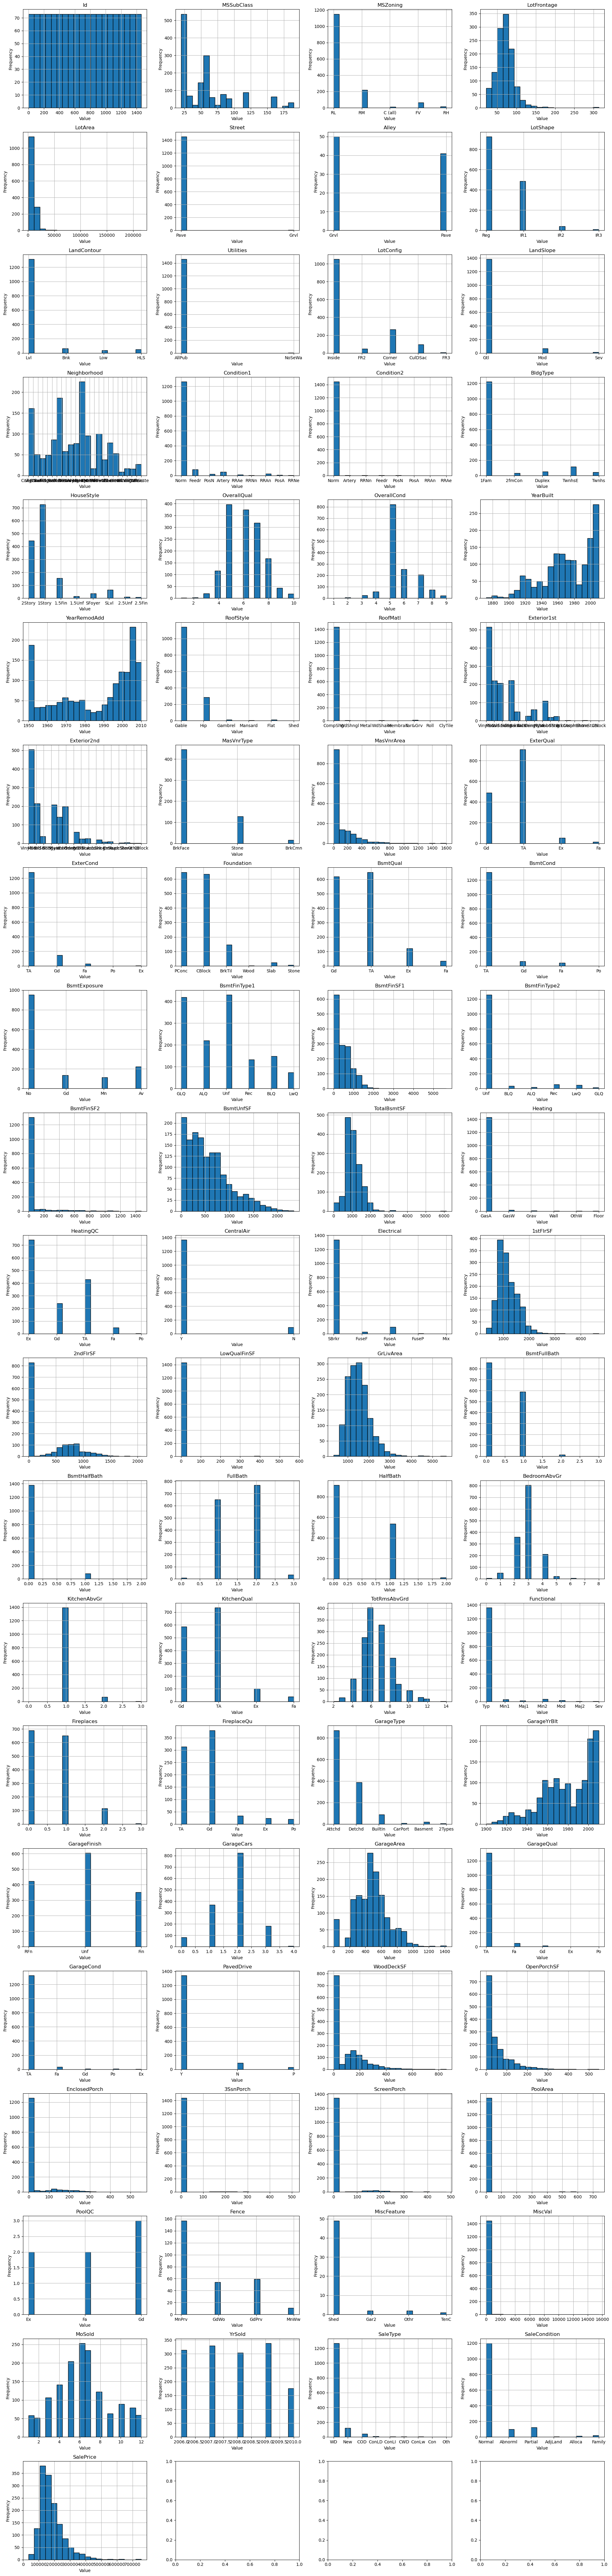

In [7]:
num_vars = train_data.shape[1] # ambil jml columns

# menentukan jumlah baris dan kolom utk grid subplot
n_cols = 4
n_rows = -(-num_vars // n_cols)

# bikin subplot, ukurannya adalah 20 x jmlh kolom * 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten() # bikin plottingan yg aslinya dimensi diaats 1 jadi 1D

for i, column in enumerate(train_data.columns):
    # plot histogram dlm bagian subplot, ax sebagai subplot dimana tempat dlm subplot, bins sebagai range pembagian data / interval
    train_data[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

Ok jadi untuk plottingan diatas, kalau empty values terlalu banyak, tidak dibuatkan plotnya. Plot diatas utk liat penyebaran data.

Untuk dibawah ini, kita coba lihat data distribution untuk beberapa fitur saja.

c:\Users\willi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\willi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\willi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\willi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

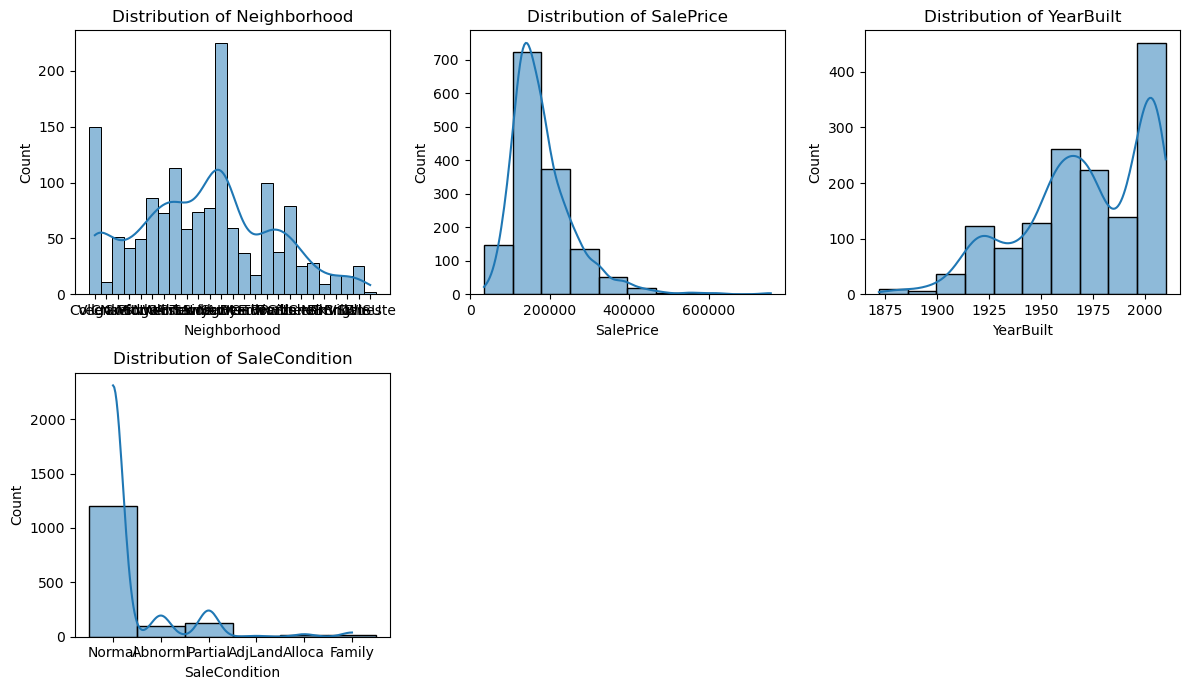

In [8]:
see_features = ['Neighborhood', 'SalePrice', 'YearBuilt', 'SaleCondition']

plt.figure(figsize=(12,7))
for i, cols in enumerate(see_features, 1):
    plt.subplot(2,3,i)
    sns.histplot(train_data[cols], kde=True, bins=10)
    plt.title(f'Distribution of {cols}')

plt.tight_layout()
plt.show()

### Data Cleaning and Transform

Show the features that have missing values

In [9]:
missing_values = train_data.isnull().sum()
missing_values[missing_values > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Ok jadi ada banyak fitur yang punya missing values. 

Suppose saya mau drop feature yang missing valuesnya diatas 30% of data

harus pakai .index supaya terkumpul dlm 1 array dan bisa diproses dlm index ketika fill empty

In [10]:
feature_under_30 = missing_values[missing_values <= (train_data.shape[0] * 0.3)].index
feature_above_30 = missing_values[missing_values > (train_data.shape[0] * 0.3)].index

Ini list of features yang missing valuesnya diatas 30% of total data

In [11]:
feature_above_30

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

Fill the features that has under 30% missing values with mode,

ini untuk numeric isinya pakai yg median

In [12]:
train_numeric = train_data[feature_under_30].select_dtypes(include=['number']).columns
train_data[train_numeric] = train_data[train_numeric].fillna(train_data[train_numeric].median())

Isi categorical data dengan modusnya aja (the only way)

In [13]:
train_categorical = train_data[feature_under_30].select_dtypes(include=['object']).columns

for cols in train_categorical:
    train_data[cols] =  train_data[cols].fillna(train_data[cols].mode()[0])

In [14]:
train_data = train_data.drop(columns = feature_above_30)

ini artinya udah gaada fitur yg isinya null lagi

In [15]:
check_miss = train_data.isnull().sum()
check_miss[check_miss > 0]

Series([], dtype: int64)

Ok, skrg kan ini kalo kita kerjain data, kita bisa cek outliers dari data. Outliers cuma ada di numeric features karena categorical itu kan sifatnya ya berdiri sendiri gitu jadi like harusnya outliers cuman ada di numerical features, jadi kita coba cek outliers dengan plot numerical features.

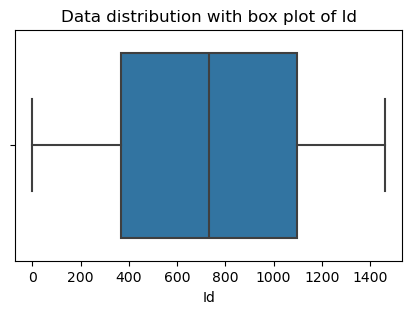

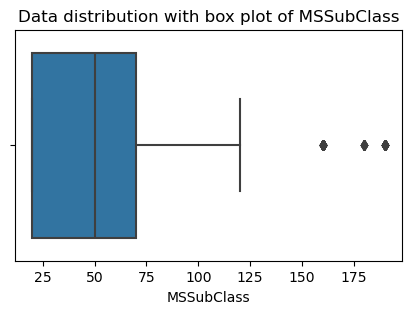

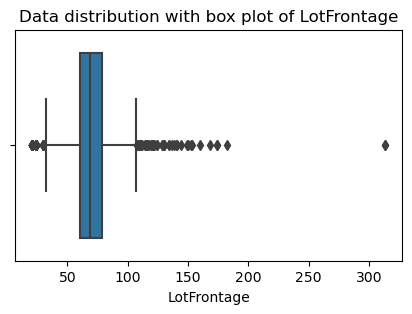

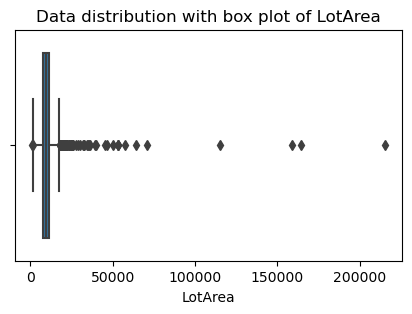

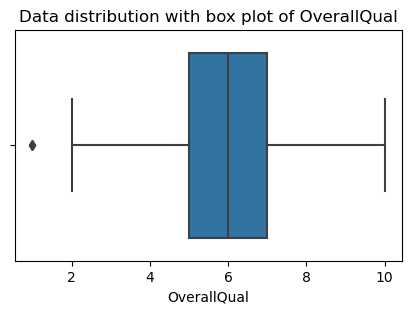

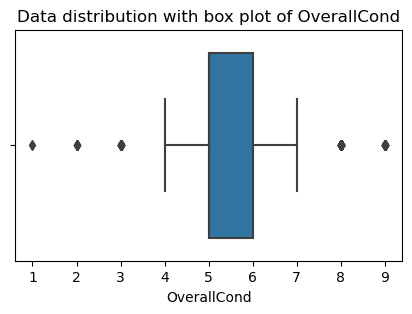

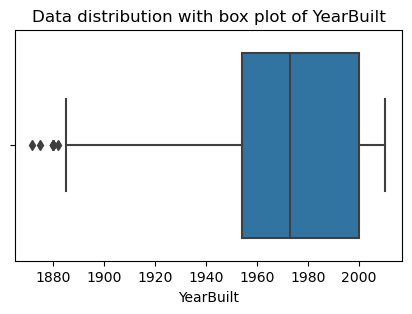

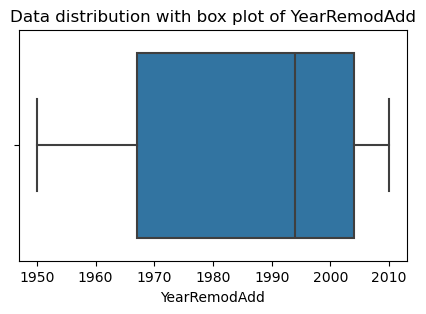

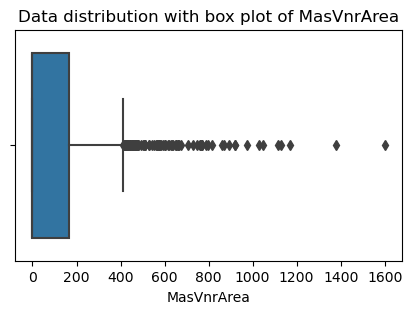

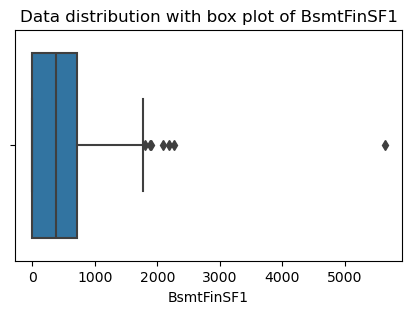

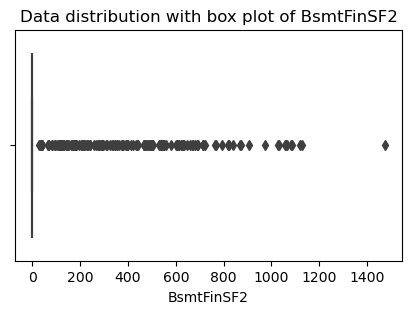

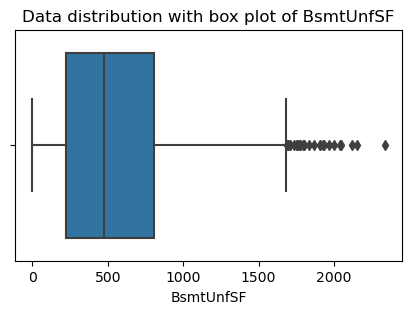

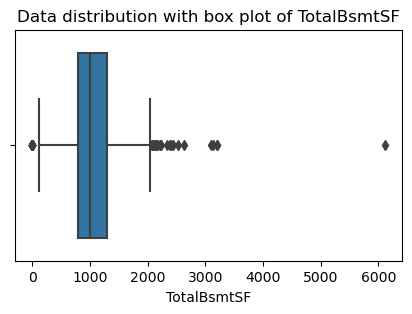

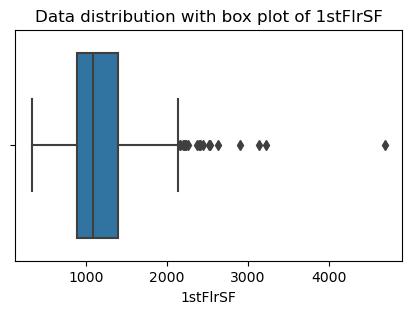

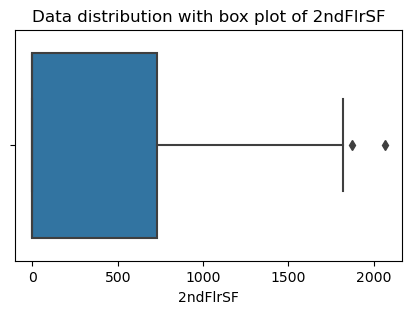

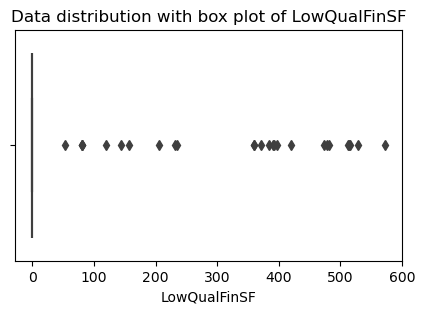

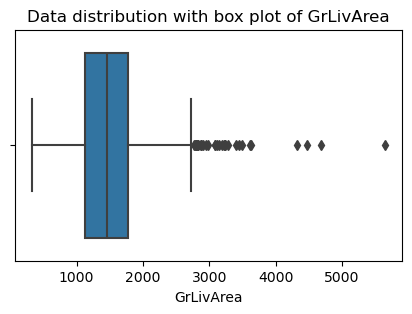

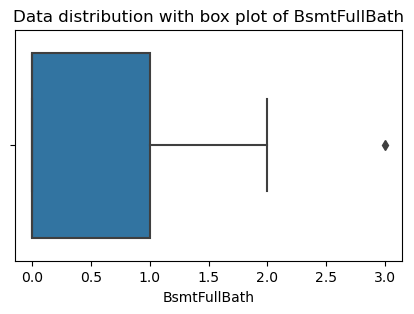

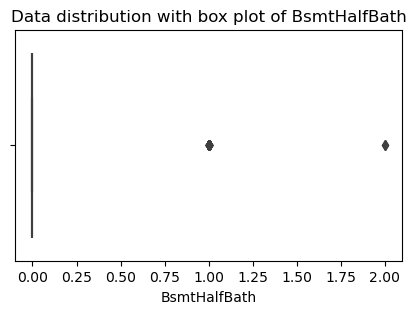

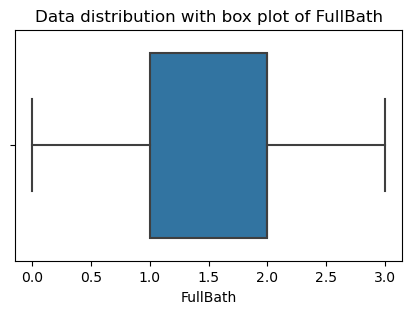

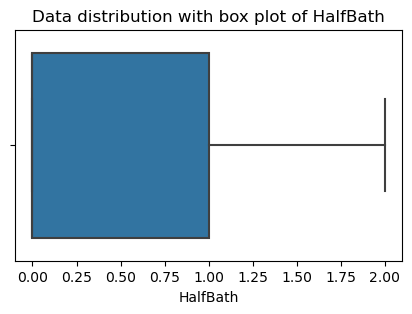

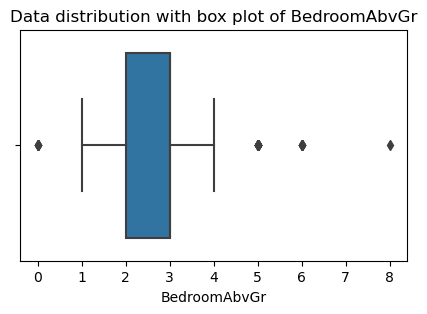

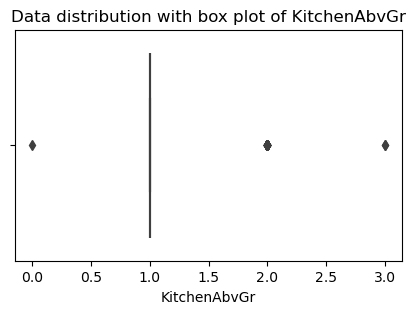

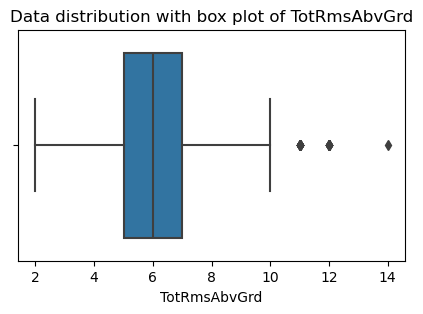

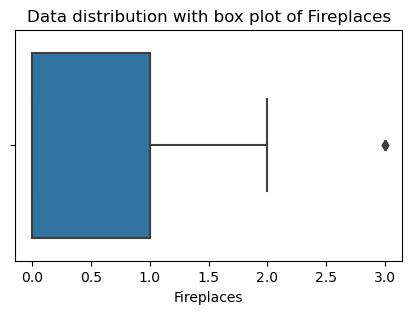

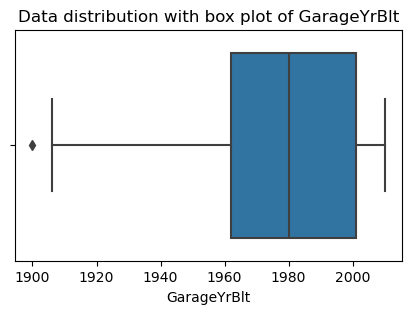

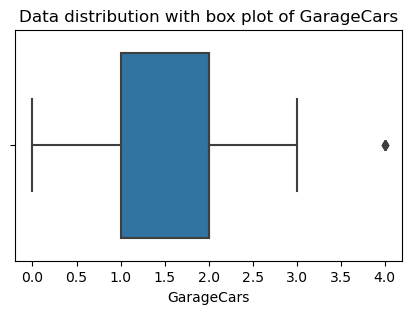

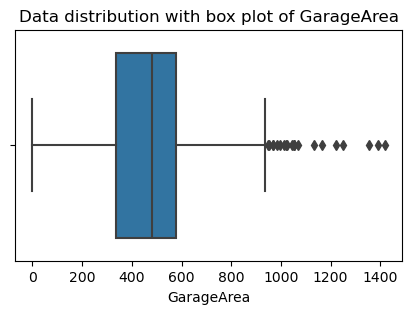

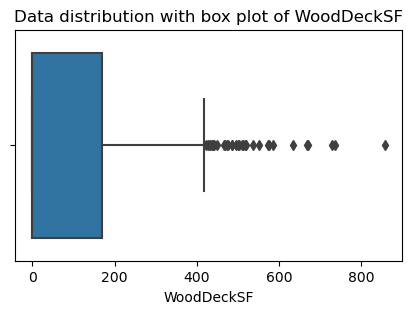

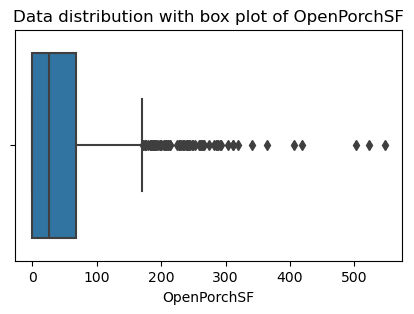

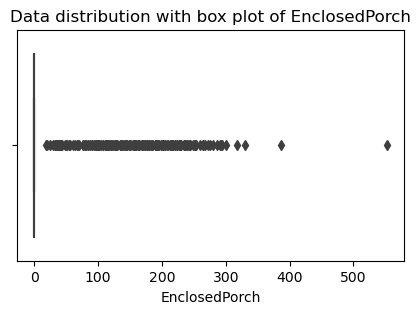

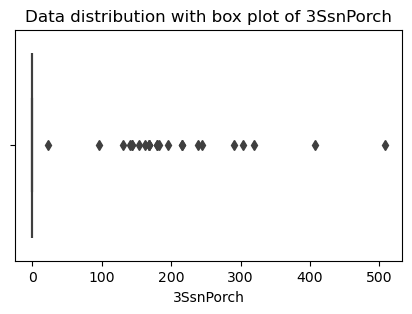

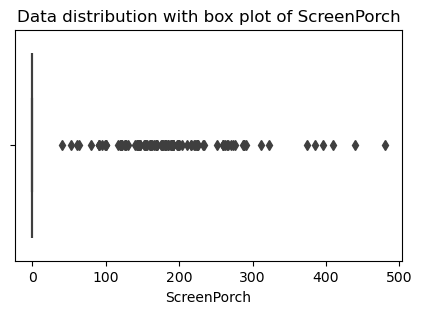

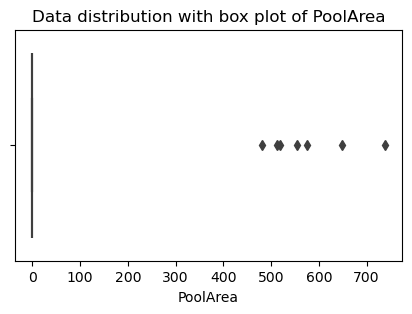

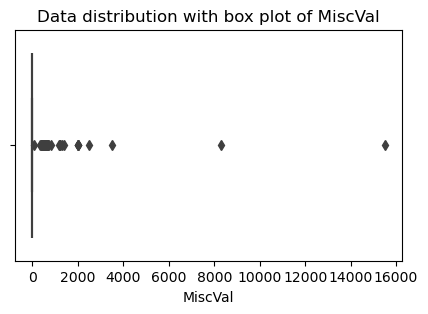

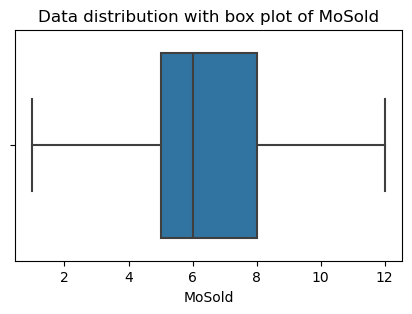

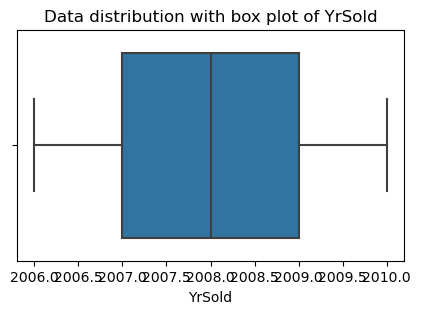

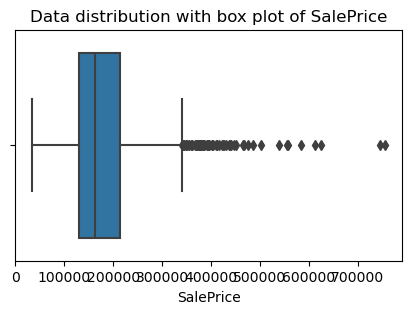

In [16]:
for i in train_numeric:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=train_data[i])
    plt.title(f'Data distribution with box plot of {i}')
    plt.show()

Dari box plot diatas, itu kan plottingannya sebenernya yang kayak ada kuartil2, itu outliers. Kita buang outliers, jadi kita cuma pakai data data yang ada di bagian kuartil dari box itu, dari Q1 sampe Q3 (disebut IQR, interquartile range).

In [17]:
q1 = train_data[train_numeric].quantile(0.25) 
q3 = train_data[train_numeric].quantile(0.75)
iqr = q3 - q1

ambil data yang ada di area 0.25 - 0.75

In [18]:
# line dibawah bacanya, cari data yang tidak dibawah batas bawah dan batas atas IQR dlm axis baris
in_iqr_area = ~((train_data[train_numeric] < (q1 - 1.5 * iqr)) | (train_data[train_numeric] > (q3 + 1.5 * iqr))).any(axis=1)
train_filter_by_numeric = train_data.loc[in_iqr_area, train_numeric]
train_filter_by_categorical = train_data.loc[in_iqr_area, train_categorical]
train_data = pd.concat([train_filter_by_numeric, train_filter_by_categorical], axis=1)

re-check outlier, recall the same thing before for checking outliers

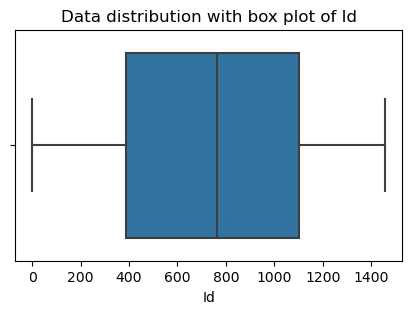

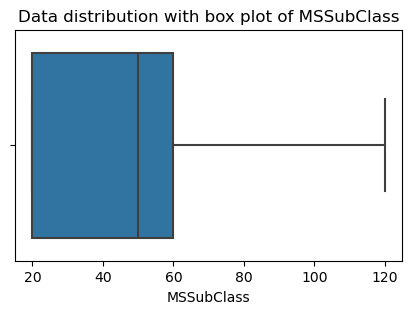

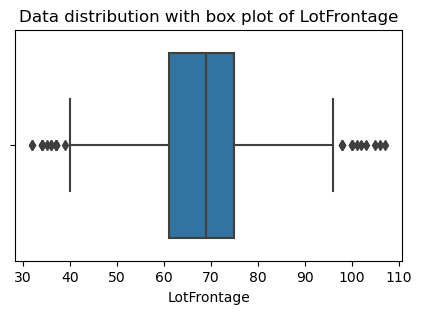

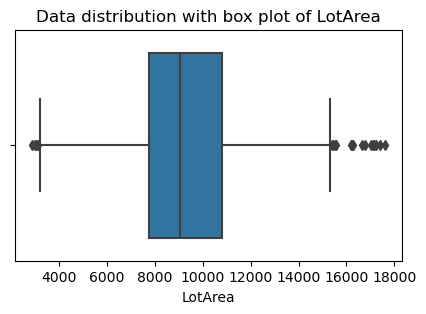

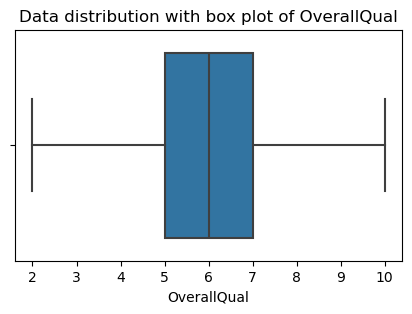

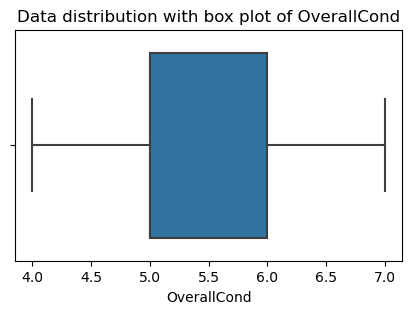

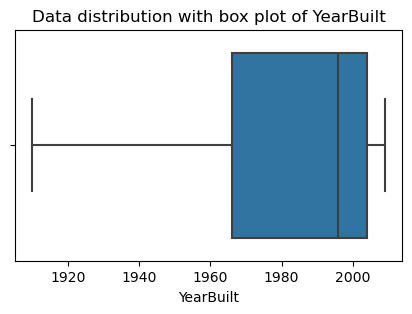

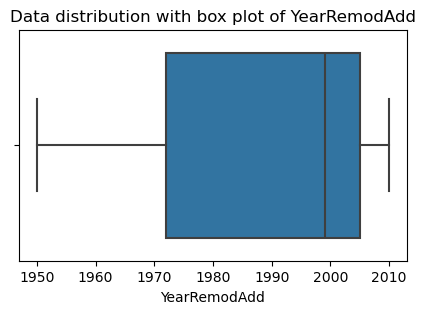

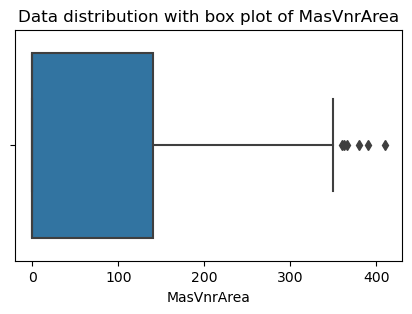

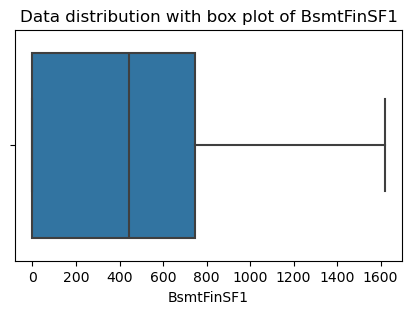

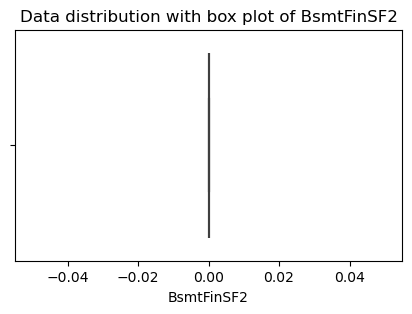

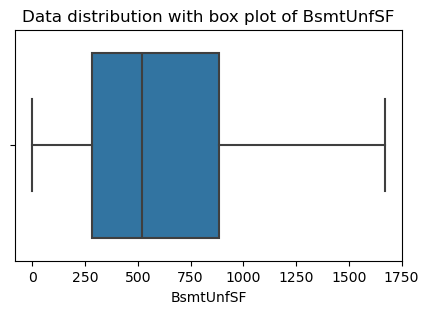

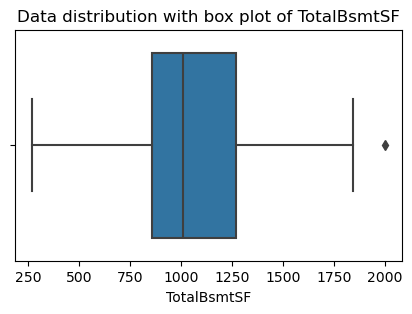

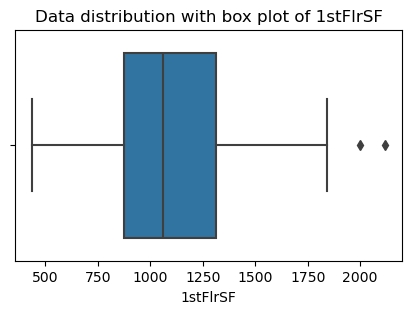

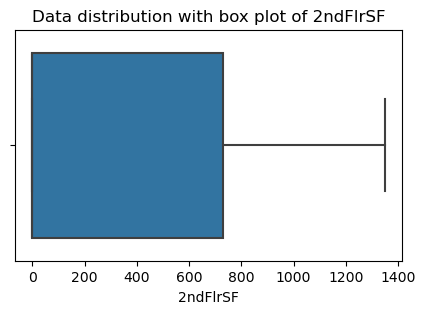

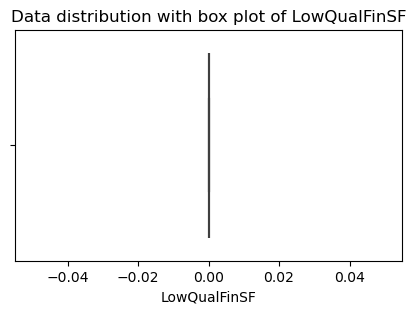

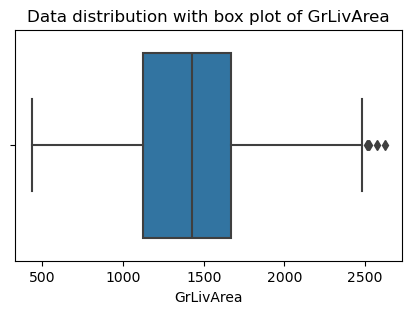

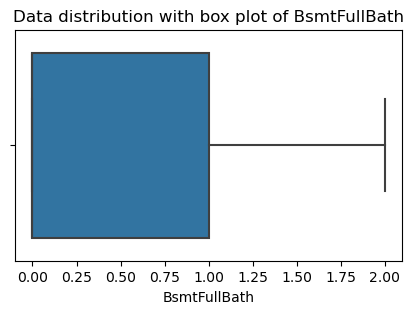

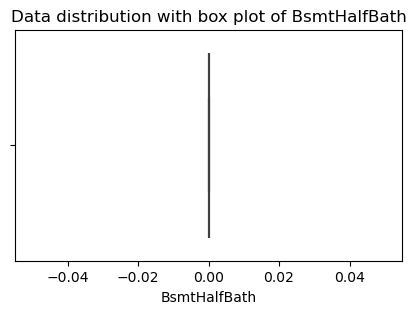

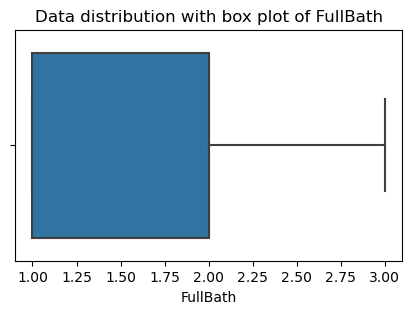

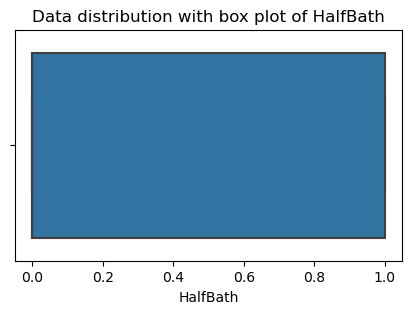

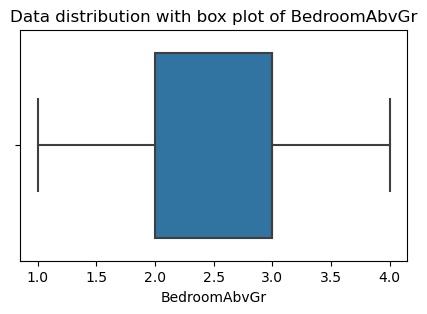

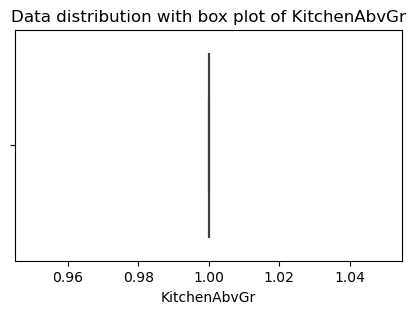

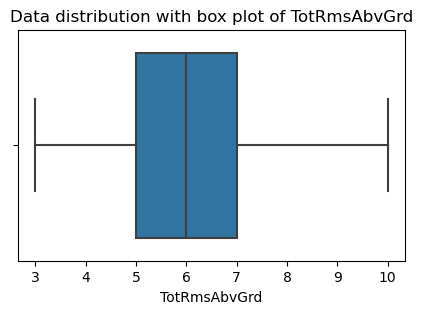

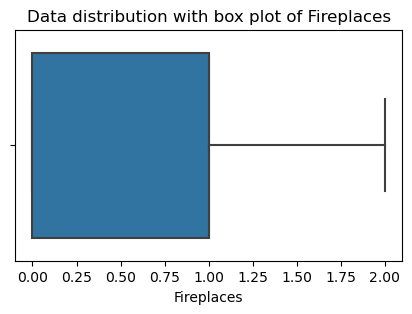

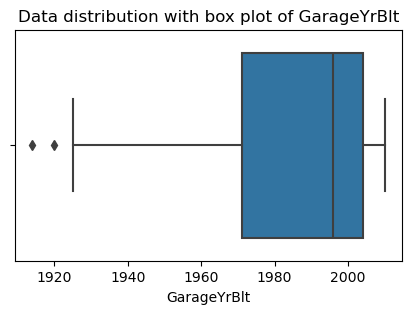

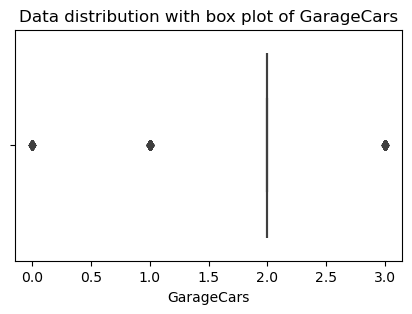

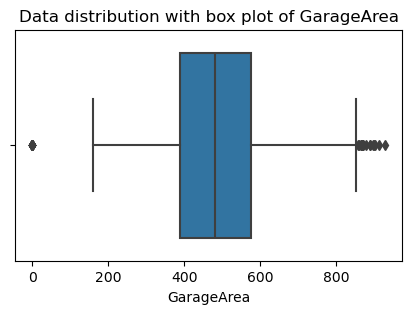

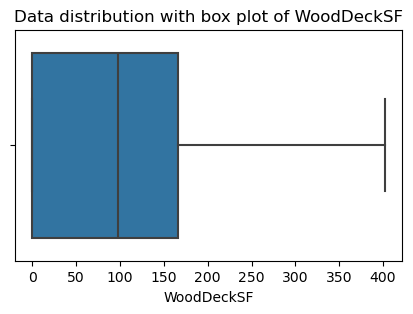

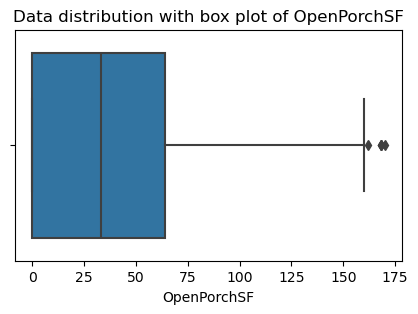

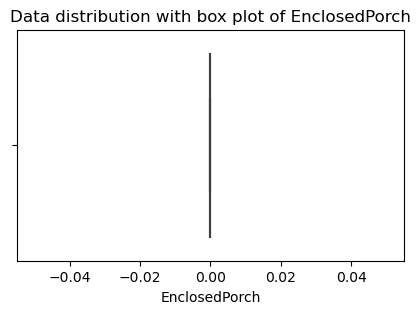

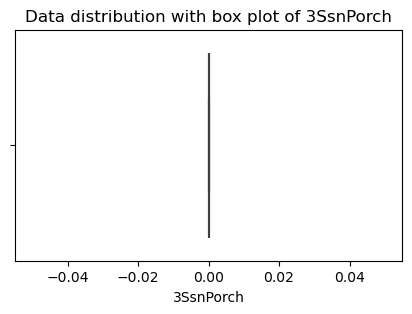

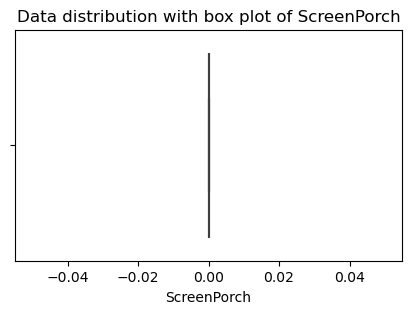

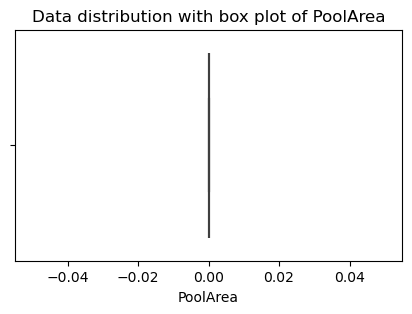

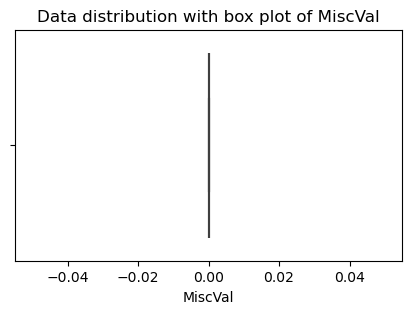

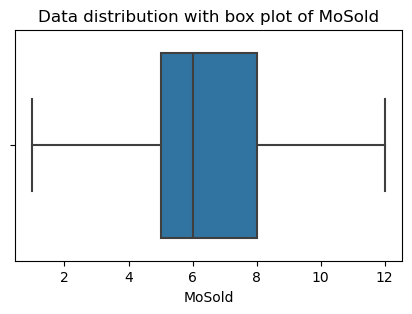

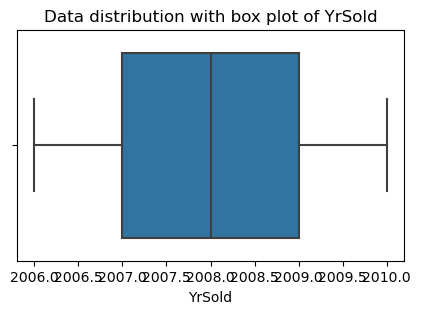

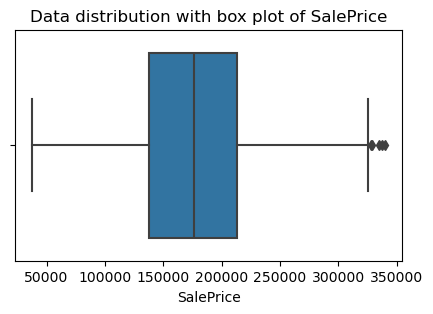

In [19]:
for i in train_numeric:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=train_data[i])
    plt.title(f'Data distribution with box plot of {i}')
    plt.show()

Better lah ya, banyak features yang outliersnya ilang,meskipun masih ada featuresnya msh ada outliersnya. 

# SELF NOTE TO VISIT LATER : kalo error jelek, perhaps bisa dibuang fitur2 yg masih ada outliersnya

Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[train_numeric] = scaler.fit_transform(train_data[train_numeric])

c:\Users\willi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Before standardization')

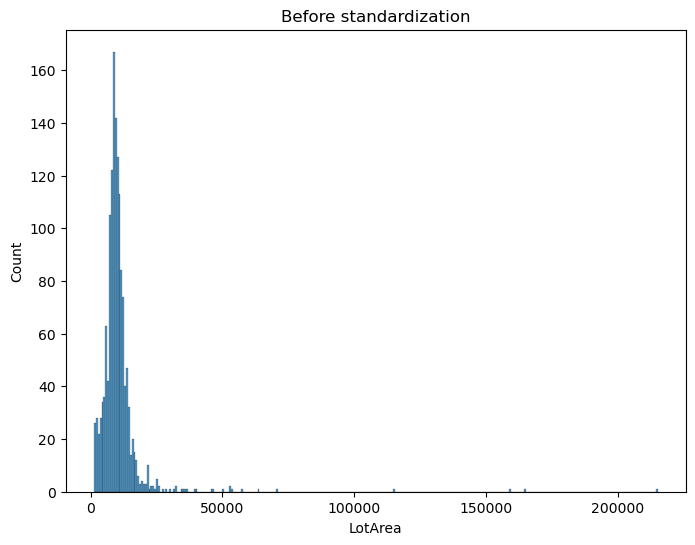

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(tumbal[train_numeric[3]])
plt.title('Before standardization')

c:\Users\willi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'After standardization')

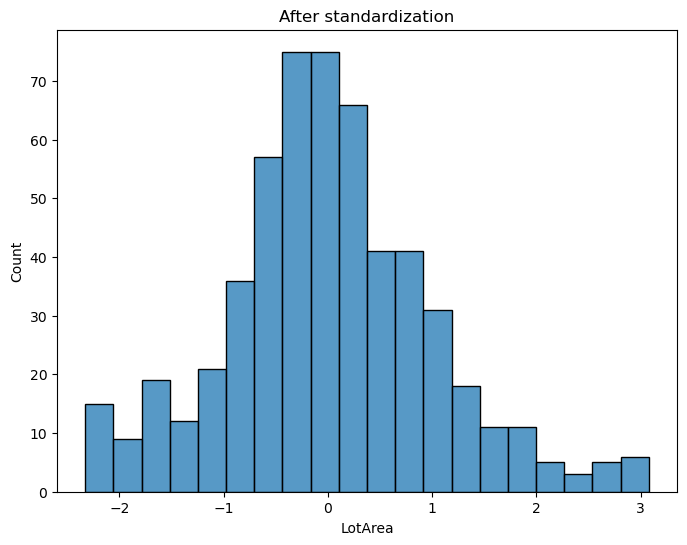

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(train_data[train_numeric[3]])
plt.title('After standardization')

Let's delete duplicate, liat dulu ada duplicate nggak

In [23]:
train_data[train_data.duplicated()]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition


ternyata tidak ada baris yg duplicate (0 rows)

Last, convert categorical into numeric

In [24]:
from sklearn.preprocessing import LabelEncoder

print(type(train_data)) # train_data udh datatype dataframe, langsung di encode aja

encoder = LabelEncoder()

# kita loop semua feature yang categorical
for i in train_categorical:
    train_data[i] = encoder.fit_transform(train_data[i])

train_data

<class 'pandas.core.frame.DataFrame'>


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,2,4,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,2,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,2,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,2,4,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,2,3,4,3,2,2,3,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,2,3,3,3,2,0,3,2,8,3
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,2,0,4,0,0,2,3,2,6,4
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,2,3,4,0,2,2,3,2,8,0
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,2,2,4,0,1,2,3,2,8,3


Correlation Matrix, ini EDA tapi cocoknya setelah preprocessing supaya categorical udh ke-convert jadi numeric dulu.

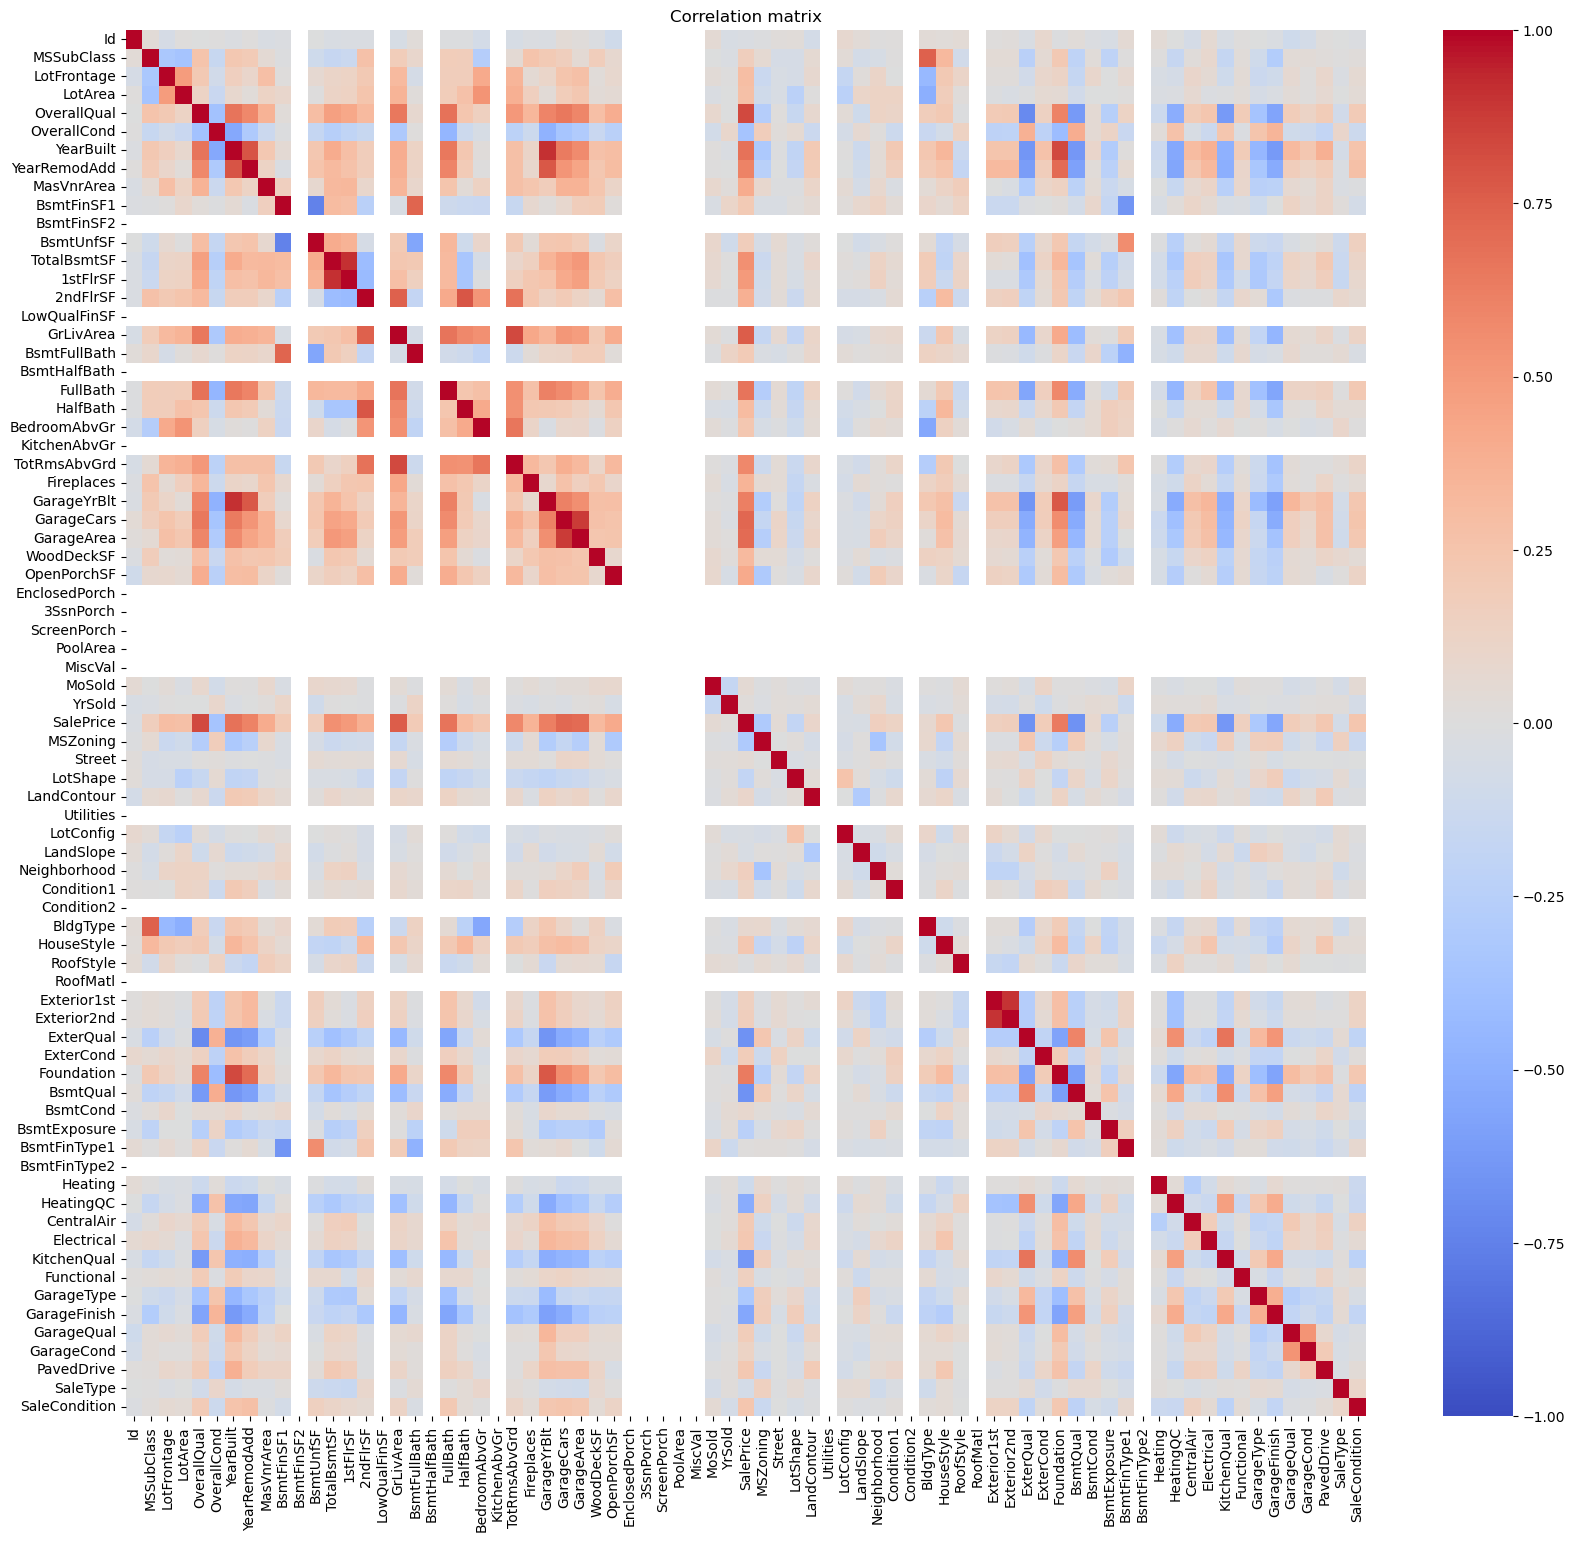

In [25]:
plt.figure(figsize=(20,18))
# hanya utk correlation matrix, kita tampung train_data di variable lain supaya bisa diconvert jadi dataframe datatype.
convert_df = pd.DataFrame(train_data)
corr_matrix = convert_df.corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

Ok, fitur ada bejibun, how do i pick features that i want to use? Jadinya saya bakal plot multivariate, hubungan tiap fitur terhadap label, lalu sort langsung mana yang tertinggi pakai correlation sort plot, and handpick myself the features i want.

In [26]:
target_corr = train_data.corr()['SalePrice']

sort_target_corr = target_corr.abs().sort_values(ascending=False) # sort 

# ambil 10 fitur yg paling terkorelasi dengan label.
features = sort_target_corr[0:9].index
sort_target_corr[0:9] # just to show how big the correlation tho

SalePrice      1.000000
OverallQual    0.832256
GrLivArea      0.762786
GarageCars     0.720632
GarageArea     0.704030
YearBuilt      0.677840
ExterQual      0.669451
FullBath       0.669307
BsmtQual       0.665815
Name: SalePrice, dtype: float64

Ini plot all correlationnya

Text(0.5, 1.0, 'Correlation with SalePrice, descending')

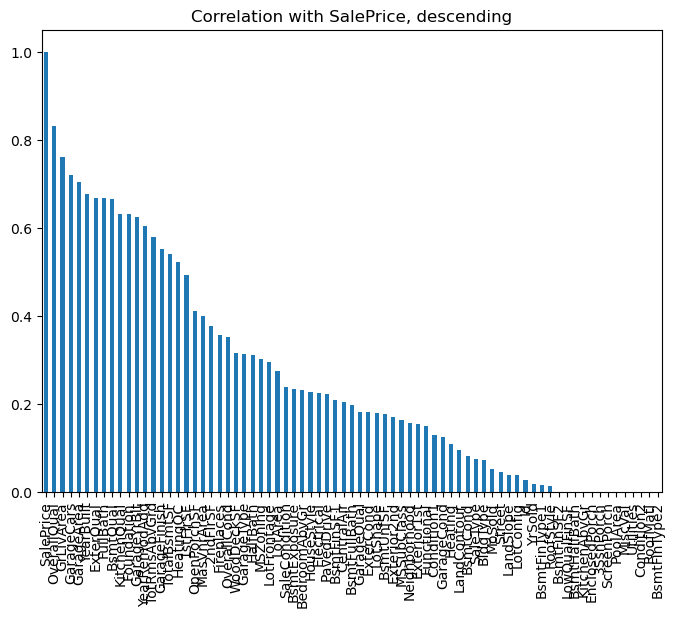

In [27]:
plt.figure(figsize=(8,6))
sort_target_corr.plot(kind='bar')
plt.title('Correlation with SalePrice, descending')

So imma create a new variable, that contains only has 10 features

In [28]:
data_features = train_data[features]
data_features

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,YearBuilt,ExterQual,FullBath,BsmtQual
0,0.535556,0.614520,0.725374,0.273711,0.383002,0.784193,2,0.787362,2
2,0.807206,0.614520,0.918998,0.273711,0.704787,0.704296,2,0.787362,2
4,1.287121,1.419903,1.968640,1.768390,1.927567,0.664347,2,0.787362,2
6,2.319391,1.419903,0.684611,0.273711,0.854953,0.824141,2,0.787362,0
10,-0.895135,-0.996245,-0.981569,-1.220967,-0.496542,-0.733845,3,-1.215199,3
...,...,...,...,...,...,...,...,...,...
1448,-1.212060,-1.801628,-0.201980,-1.220967,-0.496542,-2.931004,3,-1.215199,1
1451,1.958821,1.419903,0.389081,1.768390,1.949020,0.983934,2,0.787362,2
1453,-1.710085,-0.996245,-0.726801,-2.715646,-2.555961,0.904038,3,-1.215199,2
1454,0.109970,0.614520,-0.520440,0.273711,-0.410732,0.824141,2,0.787362,2


In [29]:
data_label = train_data['SalePrice']
data_label

0       0.535556
2       0.807206
4       1.287121
6       2.319391
10     -0.895135
          ...   
1448   -1.212060
1451    1.958821
1453   -1.710085
1454    0.109970
1455   -0.071130
Name: SalePrice, Length: 557, dtype: float64

Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, data_label, test_size=0.3, random_state=8) # why 8? DOB

Model : Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

Evaluate

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model_predict = model.predict(X_test)
model_mse = mean_squared_error(y_test, model_predict)
model_mae = mean_absolute_error(y_test, model_predict)
model_r2 = r2_score(y_test, model_predict)

print(f"MSE : {model_mse}\nMAE : {model_mae}\nR2 : {model_r2}")

MSE : 8.748966667455891e-32
MAE : 2.2105333436733028e-16
R2 : 1.0


Dengan hasil model ini, MSE, MAE, dan R2 punya nilai yang sangat kecil, yang berarti hasil prediksi dan nilai asli hampir tidak ada bedanya.

Ini bisa menandakan bahwa model sangat baik dalam memprediksi data baru, dengan error / perbedaan nilai yang sangat sangat minim.